In [3]:
import cv2
import skimage.io
from classes import *
from helpers import *
from functions import *
import matplotlib.pyplot as plt

img = skimage.io.imread('dock.jpg')
#img = skimage.io.imread('Book_5_0.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
offset = 926//2
y_center = 1080//2
x_center = 1920//2

cropped = img[y_center-offset:y_center+offset,x_center-offset:x_center+offset,:]
cropped_gray = img_gray[y_center-offset:y_center+offset,x_center-offset:x_center+offset]

size,scalingFactor,coeff_array,index_array,size_array,kernel_map = loadPickle('retina.pkl')

In [4]:
help(Retina)

Help on class Retina in module classes:

class Retina(builtins.object)
 |  Retina(fname)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, fname)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  backProject_gray(self)
 |  
 |  backProject_rgb(self)
 |  
 |  calibrate(self, img)
 |  
 |  createNormImg(self)
 |  
 |  loadArrays(self)
 |  
 |  sample_gray(self, img)
 |  
 |  sample_rgb(self, img)
 |  
 |  setFixation(self, x, y)
 |  
 |  setInputResolution(self, w, h)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



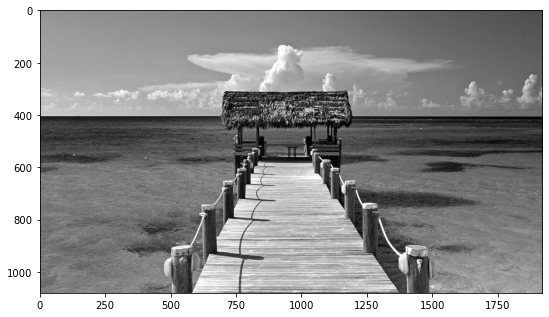

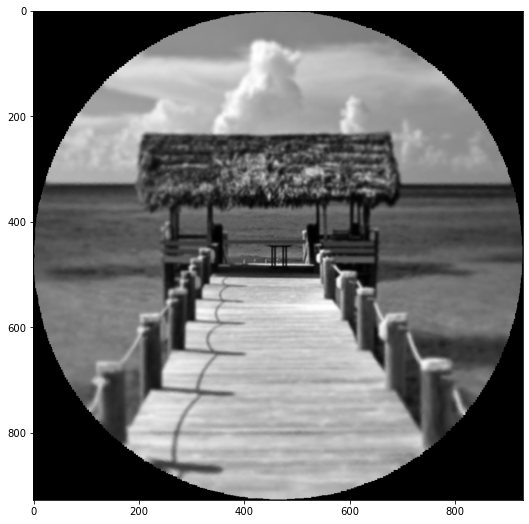

In [5]:
R = Retina('retina.pkl')
R.calibrate(img_gray)
R.sample(img_gray)
R.backProject()
plt.figure(figsize=(9,9))
plt.imshow(img_gray, cmap='gray')
plt.show()
plt.figure(figsize=(9,9))
plt.imshow(get_retinaBackProjected_GRAY(R) ,cmap='gray')
plt.show()

In [ ]:
C = Cortex('cortex.pkl')
C.calibrate(R)
C.backProject(R.getResult())
plt.figure(figsize=(9,9))
plt.imshow(get_cortexBackProjected_GRAY(C) ,cmap='gray')
plt.show()

In [ ]:
%%timeit
R.setFixation(960,540)
R.setFixation(500,500)

In [5]:
%%timeit
R.setFixation(0,0)
R.setFixation(960,540)

90.2 ms ± 4.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
%%timeit
R.sample(img_gray)

8.19 ms ± 228 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
%%timeit
R.backProject()

17.8 ms ± 171 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
%%timeit
C.backProject(R.getResult())

3.94 ms ± 151 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


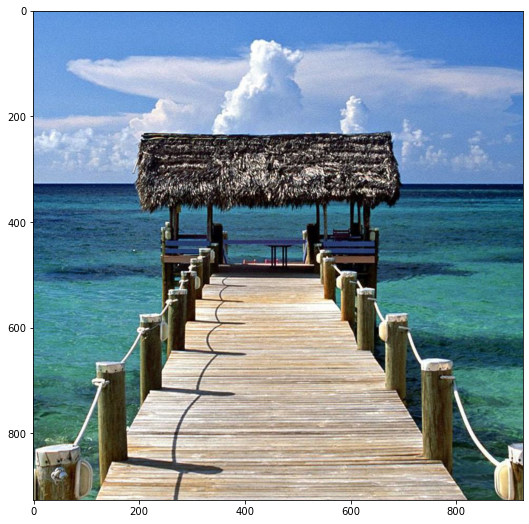

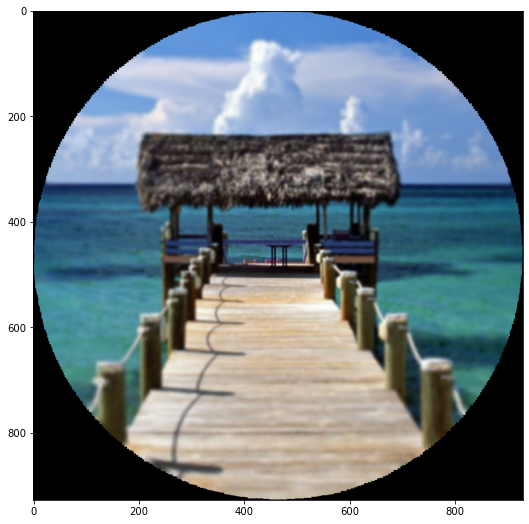

In [9]:
R.calibrate(img)
R.sample(img)
R.backProject()
plt.figure(figsize=(9,9))
plt.imshow(cropped)
plt.show()
plt.figure(figsize=(9,9))
plt.imshow(get_retinaBackProjected_RGB(R))
plt.show()

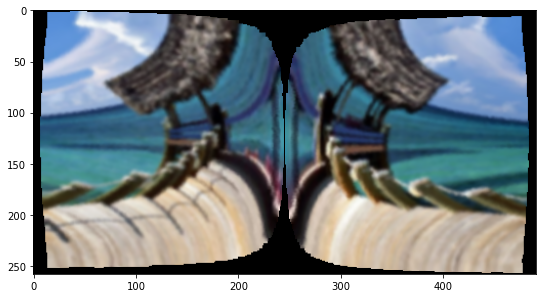

In [10]:
C = Cortex('cortex.pkl')
C.calibrate(R)
C.backProject(R.getResult())
plt.figure(figsize=(9,9))
plt.imshow(get_cortexBackProjected_RGB(C))
plt.show()

In [11]:
%%timeit
R.sample(img)

23 ms ± 1.64 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
%%timeit
R.backProject()

45.3 ms ± 1.22 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
%%timeit
C.backProject(R.getResult())

10.4 ms ± 115 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
